In [1]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt
from os import listdir, path, makedirs
from os.path import isfile, join

In [2]:
def carregar_imagem(caminho):
    imagem = imagem = cv2.imread(caminho)
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    return imagem

# Gerando conjuntos de teste e treinamento

In [3]:
faces_caminho = "imagens/cropped_faces/"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho, f))]

## Teste de leitura

imagens/cropped_faces/s01_03.jpg


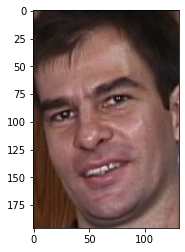

In [4]:
print(faces_caminho+lista_arq_faces[2])
imagem = carregar_imagem(faces_caminho+lista_arq_faces[2])
plt.imshow(imagem)

## Detecção de face

In [5]:
detector_face = dlib.get_frontal_face_detector()

In [6]:
def retangulo_delimitador(imagem):
    retangulos = detector_face(imagem, 1)
    if retangulos is not None:
        for k,d in enumerate(retangulos):
            cv2.rectangle(imagem, (d.left(),d.top()),(d.right(),d.bottom()),(255,255,0),1)
    return imagem

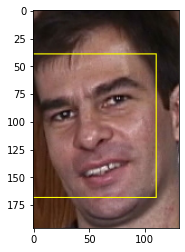

In [7]:
imagem_delimitada = imagem.copy()
imagem_delimitada = retangulo_delimitador(imagem_delimitada)
plt.imshow(imagem_delimitada)

In [8]:
def recortar_imagem(imagem):
    retangulos = detector_face(imagem, 1)
    if retangulos is not None:
        for k,d in enumerate(retangulos):
            if d.left() < 0:
                left = 0
            else:
                left = d.left()
            if d.right() < 0:
                right = 0;
            else:
                right = d.right()
            if d.top()< 0:
                top = 0
            else:
                top = d.top()
            if d.bottom()<0:
                bottom = 0
            else:
                bottom = d.bottom()
            imagem = imagem[top:bottom,left:right]
    return imagem

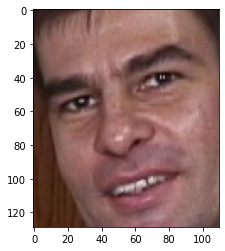

In [9]:

d = recortar_imagem(imagem)
#print(d)
plt.imshow(d)

## Estração da face para conjunto de teste e treinamento

In [10]:
def salvar_face(caminho,imagem):
    imagem_bgr = cv2.cvtColor(imagem, cv2.COLOR_RGB2BGR)
    cv2.imwrite(caminho, imagem_bgr)

In [11]:
faces_path_treino = "imagens/treino/"
faces_path_teste = "imagens/teste/"

if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)

if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)

for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4:6]
    
    if int(numero) <= 10:
        imagem = carregar_imagem(faces_caminho+arq)
        imagem = recortar_imagem(imagem)
        salvar_face(faces_path_treino + arq,imagem)
    else:
        imagem = carregar_imagem(faces_caminho+arq)
        imagem = recortar_imagem(imagem)
        salvar_face(faces_path_teste + arq,imagem)

## Verificações dos dados de teste e treinamento

### Dados de treinamento

In [21]:
lista_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino, f))]
lista_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste, f))]

In [42]:
dados_treinamento, sujeitos = [], []

In [43]:
for i, arq in enumerate(lista_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = carregar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

52


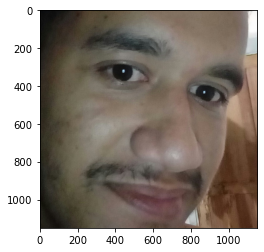

In [48]:
plt.imshow(dados_treinamento[510])
print(sujeitos[510])

In [16]:
len(sujeitos)

520

In [17]:
dados_teste, sujeitos_teste = [], [] 

In [18]:
for i, arq in enumerate(lista_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = carregar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

In [19]:
len(dados_teste)

260

In [20]:
len(sujeitos_teste)

260